In [12]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from scipy import constants
%matplotlib inline
from numpy import *

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker

import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle


In [14]:
39e9 /((1.9e-19)**2/(2*5.2e-15)/(2*np.pi*1.054e-34))*0.72**2

3.8572360452181247

In [15]:
sqrt(39e9*2*np.pi*1.054e-34/(5.2e-15))*2*1.9e-19/1.054e-34

254087825805.81781

In [16]:
sqrt(39e9*2*np.pi*1.054e-34*4*(1.9e-19)**2/(1.054e-34)**2/5.2e-15)/2/np.pi

40439333456.468353

In [17]:
2*np.pi*2*1.9e-19*50e9

1.1938052083641214e-07

In [18]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')
#phix2 = QVariable('φx2')
phix.create_grid(16, 1)
phiy.create_grid(16, 1)
phiz.create_grid(16, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

#EjEc_ratio = 80
alpha = 0.72
flux_steps = 3
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 50e9
#Ec = 21e9
Ec = 2*1.6e-19**2/(5.2e-15)/(2*np.pi*1.054e-34)
#Ec = 1.6e-19**2/(2*3.5e-15)/(2*np.pi*1.054e-34)
#Ec = 2*1.6e-19**2/3.5e-15/(1.054e-34)

FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
FQ3JJ.find_element('CC').set_capacitance(alpha/(2*Ec))

phi_range = np.linspace((0)*2*np.pi, (1)*2*np.pi, flux_steps)
#phi_range = np.linspace((0.349277+0.0000011)*2*np.pi, (0.349277+0.0000013)*2*np.pi, flux_steps)

for phie_id, phie_value in enumerate(phi_range):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[phie_id, :] = eigenenergies
    #print phie_id
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: ComplexWarning: Casting complex values to real discards the imaginary part


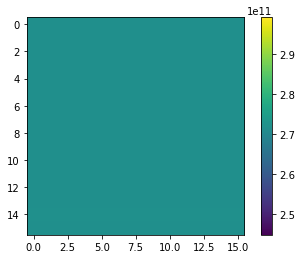

In [19]:
phie.set_parameter(0, 0)
FQ3JJ.calculate_potentials()
plt.imshow(FQ3JJ.phase_potential[0,:,:,0])
plt.colorbar()

In [20]:
print(Ec/1e9)
print(Ej/1e9)

14.867780408526203
50.0


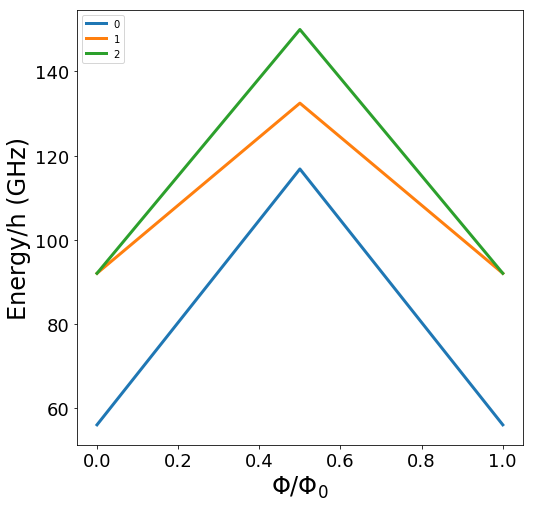

In [21]:
fig, axes = plt.subplots(figsize=(8, 8))

#plt.plot(np.linspace((0.349277+0.0000011), (0.349277+0.0000013), flux_steps), (energies[:,0])/1e9, 'r', linewidth=3.0)
#plt.plot(np.linspace((0.349277+0.0000011), (0.349277+0.0000013), flux_steps), (energies[:,1])/1e9, 'b', linewidth=3.0)

plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,0])/1e9, linewidth=3.0,  label='0')
plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,1])/1e9, linewidth=3.0,  label='1')
plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,2])/1e9, linewidth=3.0,  label='2')
#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,3])/1e9, linewidth=3.0,  label='3')

#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,4])/1e9, linewidth=3.0,  label='4')
#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,5])/1e9, linewidth=3.0,  label='5')
#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,6])/1e9, linewidth=3.0,  label='6')
#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,7])/1e9, linewidth=3.0,  label='7')

#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,8])/1e9, linewidth=3.0,  label='8')
#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,9])/1e9, linewidth=3.0,  label='9')
#plt.plot(np.linspace((0), (1), flux_steps), (energies[:,10])/1e9, linewidth=3.0, label='10')
#plt.plot(np.linspace((0), (1), flux_steps), (energies[:,11])/1e9, linewidth=3.0, label='11')

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Energy/h (GHz)', fontsize=24)

axes.axis('tight')

pylab.legend(loc='upper left')

#handles, labels = axes.get_legend_handles_labels()
#axes.legend(handles, labels)
#plt.legend(handles=[p1,p2,p3,p4,p5,p6,p7,p8])

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#plt.gcf().set_size_inches(8,8)
#plt.savefig("C:/neon/levels_twin_close_1_2_levels.pdf", bbox_inches="tight")

(0, 1)

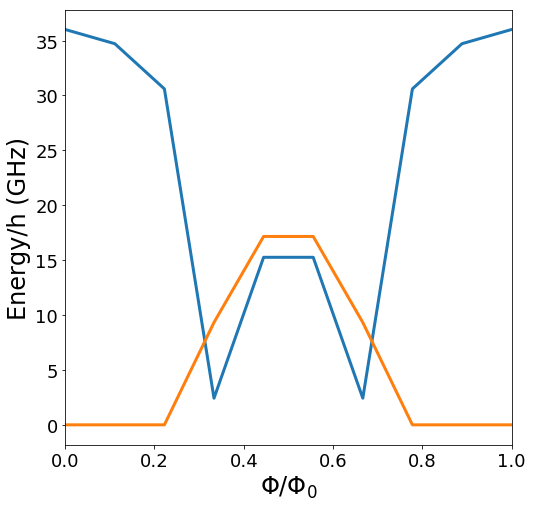

In [5]:
fig, axes = plt.subplots(figsize=(8, 8))

plt.plot(np.linspace(0, 1, flux_steps), (energies[:,1]-  energies[:,0])/1e9,  linewidth=3.0,  label='E$_{01}$')
plt.plot(np.linspace(0, 1, flux_steps), (energies[:,2]-  energies[:,1])/1e9,  linewidth=3.0,  label='E$_{12}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,3]-  energies[:,2])/1e9,  linewidth=3.0,  label='E$_{23}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,4]-  energies[:,3])/1e9,  linewidth=3.0,  label='E$_{34}$')

#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,5]-  energies[:,4])/1e9,  linewidth=3.0,  label='E$_{45}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,6]-  energies[:,5])/1e9,  linewidth=3.0,  label='E$_{56}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,7]-  energies[:,6])/1e9,  linewidth=3.0,  label='E$_{67}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,8]-  energies[:,7])/1e9,  linewidth=3.0,  label='E$_{78}$')

#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,9]-  energies[:,8])/1e9,  linewidth=3.0,  label='E$_{89}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,10]- energies[:,9])/1e9,  linewidth=3.0,  label='E$_{9-10}$')
#plt.plot(np.linspace(0, 1, flux_steps), (energies[:,11]-energies[:,10])/1e9,  linewidth=3.0,  label='E$_{10-11}$')

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Energy/h (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#pylab.legend(loc='upper left')

axes.set_xlim(0, 1)

#plt.gcf().set_size_inches(8,8)
#plt.savefig("C:/neon/levels_01-12_twin_qubits.pdf", bbox_inches="tight")

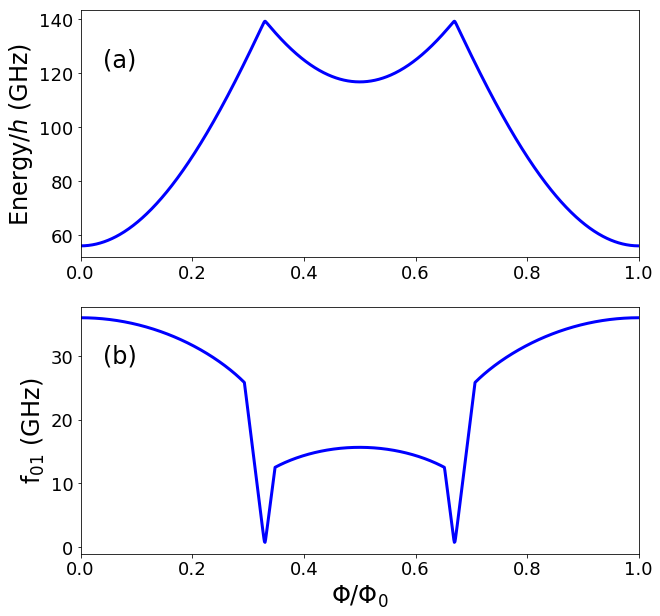

In [4]:
fig, axes = plt.subplots(2,1,figsize=(10, 10))

p = axes[0].plot(np.linspace((0), (1), flux_steps),  (energies[:,0])/1e9,  'b', linewidth=3.0)
#plt.plot(np.linspace((0), (1), flux_steps),  (energies[:,1])/1e9, linewidth=3.0)

p = axes[1].plot(np.linspace((0), (1), flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)

#axes[0].set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes[1].set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes[0].set_ylabel(r'Energy/$h$ (GHz)', fontsize=24)
axes[1].set_ylabel(r'f$_{01}$ (GHz)', fontsize=24)

axes[0].axis('tight')
axes[1].axis('tight')

axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[0].text(0.04, 125,'(a)', fontsize=24, verticalalignment='center')
axes[1].text(0.04, 30,'(b)', fontsize=24, verticalalignment='center')

axes[0].set_xlim(0, 1)
axes[1].set_xlim(0, 1)


plt.gcf().set_size_inches(10,10)
plt.savefig("C:/neon/levels_twin_0-1_couple.pdf", bbox_inches="tight")

In [25]:
(energies[63,1]-energies[63,0])/1e9

7.5464910575467528

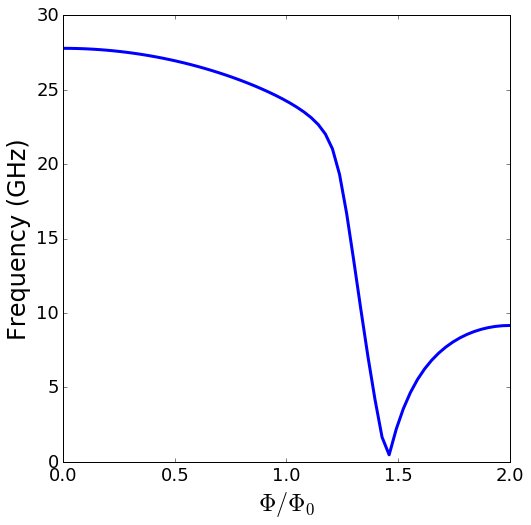

In [65]:
fig, axes = plt.subplots(figsize=(8, 8))

# original
#Z = np.real(U)
plt.plot(np.linspace(0, 2, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#axes.set_ylim((0, 1))

#plt.plot(np.linspace(-6*np.pi, 6*np.pi, flux_steps), energies[:,1]-energies[:,0])
#plt.plot(np.linspace(-0.9*np.pi, -0.1*np.pi, flux_steps), (energies[:,2]-energies[:,0])/2)

#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), -(energies[:,1]-energies[:,0])+(energies[:,2]-energies[:,1]), 'r')
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,2]-energies[:,1])
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,3]-energies[:,2])

#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/neon/diagonalization_plot_6.pdf", bbox_inches="tight")

# Alpha variations

In [ ]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')
#phix2 = QVariable('φx2')
phix.create_grid(12, 1)
phiy.create_grid(12, 1)
phiz.create_grid(12, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

#EjEc_ratio = 80
alpha_steps = 100
alpha_range = np.linspace(0.1, 4.0, alpha_steps)

flux_steps = 100
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((flux_steps,alpha_steps,4), dtype=np.float)

Ej = 50e9
Ec = 2*1.9e-19**2/(3.5e-15)/(2*np.pi*1.054e-34)

FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))

phi_range = np.linspace((0)*2*np.pi, (1)*2*np.pi, flux_steps)

for alpha_id, alpha_value in enumerate(alpha_range):
    for phie_id, phie_value in enumerate(phi_range):
        phie.set_parameter(phie_value, 0)
        FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha_value)
        FQ3JJ.find_element('CC').set_capacitance(alpha_value/2*Ec)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
        energies[phie_id, alpha_id, :] = eigenenergies
    print (alpha_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: ComplexWarning: Casting complex values to real discards the imaginary part


In [12]:
(energies[0,1,1]-energies[0,1,0])/1e9

9.4782356754699713

In [13]:
(energies[1,1,1]-energies[1,1,0])/1e9

2.5765140522447663

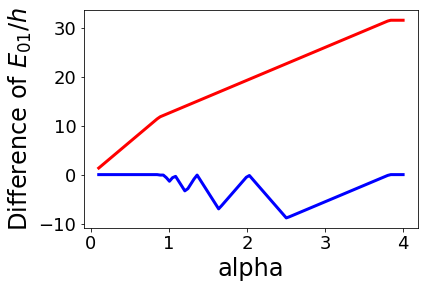

In [55]:
plt.plot(alpha_range, ((energies[0,:,1]-energies[0,:,0])-(energies[1,:,1]-energies[1,:,0]))/1e9, 'r', linewidth=3.0)
plt.plot(alpha_range, ((energies[0,:,2]-energies[0,:,1])-(energies[1,:,2]-energies[1,:,1]))/1e9, 'b', linewidth=3.0)
#plt.plot(alpha_range, ((energies[0,:,3]-energies[0,:,2])-(energies[1,:,3]-energies[1,:,2]))/1e9, 'g', linewidth=3.0)
plt.ylabel(r'Difference of $E_{01}/h$', fontsize=24)
plt.xlabel(r'alpha', fontsize=24)


plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

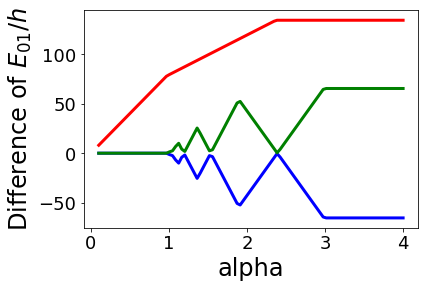

In [50]:
plt.plot(alpha_range, ((energies[0,:,1]-energies[0,:,0])-(energies[1,:,1]-energies[1,:,0]))/1e9, 'r', linewidth=3.0)
plt.plot(alpha_range, ((energies[0,:,2]-energies[0,:,1])-(energies[1,:,2]-energies[1,:,1]))/1e9, 'b', linewidth=3.0)
plt.plot(alpha_range, ((energies[1,:,2]-energies[1,:,1]))/1e9, 'g', linewidth=3.0)
plt.ylabel(r'Difference of $E_{01}/h$', fontsize=24)
plt.xlabel(r'alpha', fontsize=24)


plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

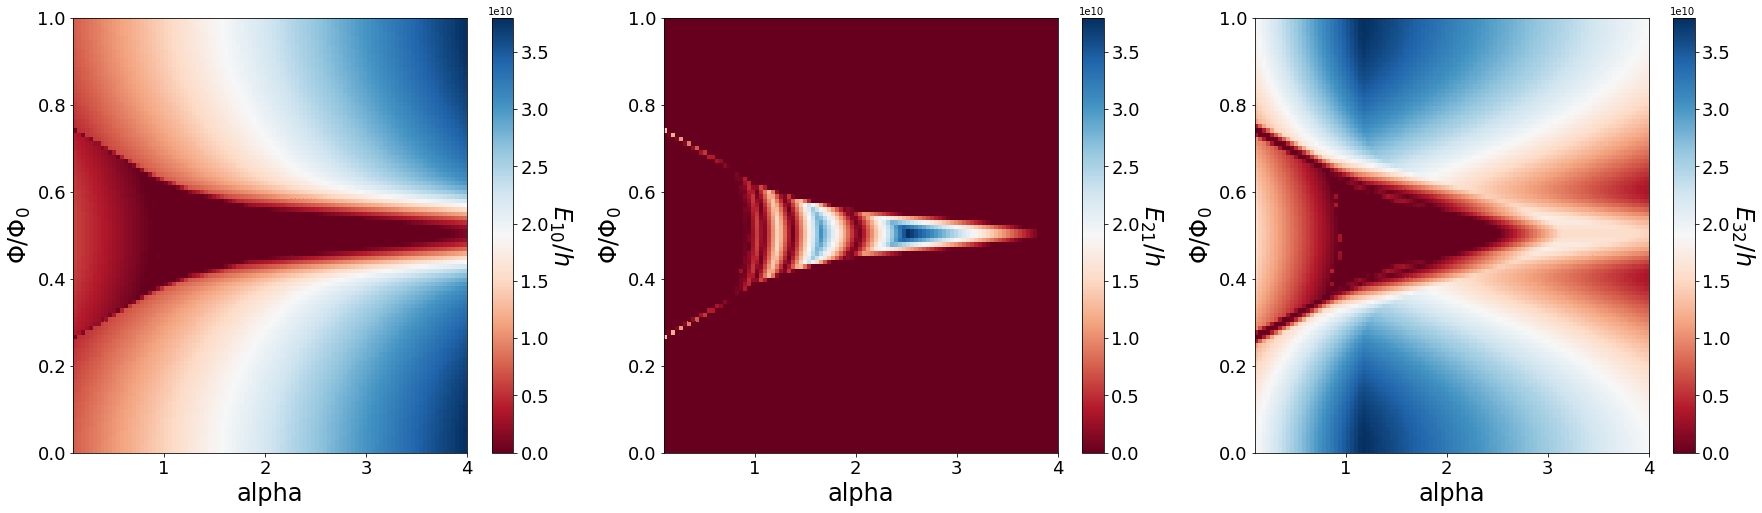

In [66]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 3, figsize=(30, 8))


X, Y = phi_range, alpha_range
X, Y = np.meshgrid(X, Y)
Z1 = energies[:,:,0]
Z2 = energies[:,:,1]
Z10 = energies[:,:,1]-energies[:,:,0]
Z21 = energies[:,:,2]-energies[:,:,1]
Z32 = energies[:,:,3]-energies[:,:,2]


#surf = axes.plot_surface(X,Y, Z.T, cmap=cm.rainbow, linewidth=0, antialiased=False)
p = axes[0].pcolor(Y, X/2/np.pi, Z10.T, cmap=cm.RdBu)
p = axes[1].pcolor(Y, X/2/np.pi, Z21.T, cmap=cm.RdBu)
p = axes[2].pcolor(Y, X/2/np.pi, Z32.T, cmap=cm.RdBu)
#plt.plot(np.linspace((0), (1), flux_steps), (energies[:,0])/1e9, 'r', linewidth=3.0)
#plt.plot(np.linspace((0), (1), flux_steps), (energies[:,1])/1e9, 'b', linewidth=3.0)

axes[0].set_ylabel(r'$\Phi/\Phi_0$', fontsize=24)
axes[0].set_xlabel(r'alpha', fontsize=24)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)

axes[1].set_ylabel(r'$\Phi/\Phi_0$', fontsize=24)
axes[1].set_xlabel(r'alpha', fontsize=24)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)

axes[2].set_ylabel(r'$\Phi/\Phi_0$', fontsize=24)
axes[2].set_xlabel(r'alpha', fontsize=24)
axes[2].tick_params(axis='x', labelsize=18)
axes[2].tick_params(axis='y', labelsize=18)

cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'$E_{10}/h$', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'$E_{21}/h$', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

cb = fig.colorbar(p, ax=axes[2])
cb.set_label(r'$E_{32}/h$', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 


#plt.gcf().set_size_inches(30,8)
#plt.savefig("C:/neon/twin qubits/Alpfa Variation_E01_E21_Ej=50e9.pdf", bbox_inches="tight")

# Alpha and $E_j/E_c$ variations

In [41]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')

phix.create_grid(12, 1)
phiy.create_grid(12, 1)
phiz.create_grid(12, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

EjEc_steps = 100
EjEc_range = np.linspace(1.0, 50.0, EjEc_steps)

alpha_steps = 100
alpha_range = np.linspace(0.5, 3.0, alpha_steps)

flux_steps = 2
phi_range = np.linspace((0)*2*np.pi, (0.5)*2*np.pi, flux_steps)

energies = np.zeros((flux_steps,alpha_steps,EjEc_steps,4), dtype=np.float)

Ej = 300e9
#Ec = 2*1.9e-19**2/(3.5e-15)/(2*np.pi*1.054e-34)


for alpha_id, alpha_value in enumerate(alpha_range):
    for phie_id, phie_value in enumerate(phi_range):
        phie.set_parameter(phie_value, 0)
        for EjEc_id, EjEc_value in enumerate(EjEc_range):
            Ec = Ej/EjEc_value
            FQ3JJ.find_element('JJA').set_critical_current(Ej)
            FQ3JJ.find_element('JJB').set_critical_current(Ej)
            FQ3JJ.find_element('JJD').set_critical_current(Ej)
            FQ3JJ.find_element('JJE').set_critical_current(Ej)
            FQ3JJ.find_element('CA').set_capacitance(1/(2*Ec))
            FQ3JJ.find_element('CB').set_capacitance(1/(2*Ec))
            FQ3JJ.find_element('CD').set_capacitance(1/(2*Ec))
            FQ3JJ.find_element('CE').set_capacitance(1/(2*Ec))
            FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha_value)
            FQ3JJ.find_element('CC').set_capacitance(alpha_value/2*Ec)
            FQ3JJ.calculate_potentials()
            [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
            energies[phie_id, alpha_id, EjEc_id, :] = eigenenergies
    print (alpha_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:62: ComplexWarning: Casting complex values to real discards the imaginary part


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [44]:
xgrid, ygrid = np.meshgrid(alpha_range, EjEc_range)

# В узлах рассчитываем значение функции
zgrid0 = xgrid+ygrid
zgrid1 = xgrid+ygrid

for i in arange (0, alpha_steps-1, 1):
    for j in arange (0, EjEc_steps-1, 1):
        zgrid0[j][i]=((energies[1,i,j,1]-energies[1,i,j,0])-(energies[0,i,j,1]-energies[0,i,j,0]))
        zgrid1[j][i]=((energies[1,i,j,2]-energies[1,i,j,1])-(energies[0,i,j,2]-energies[0,i,j,1]))


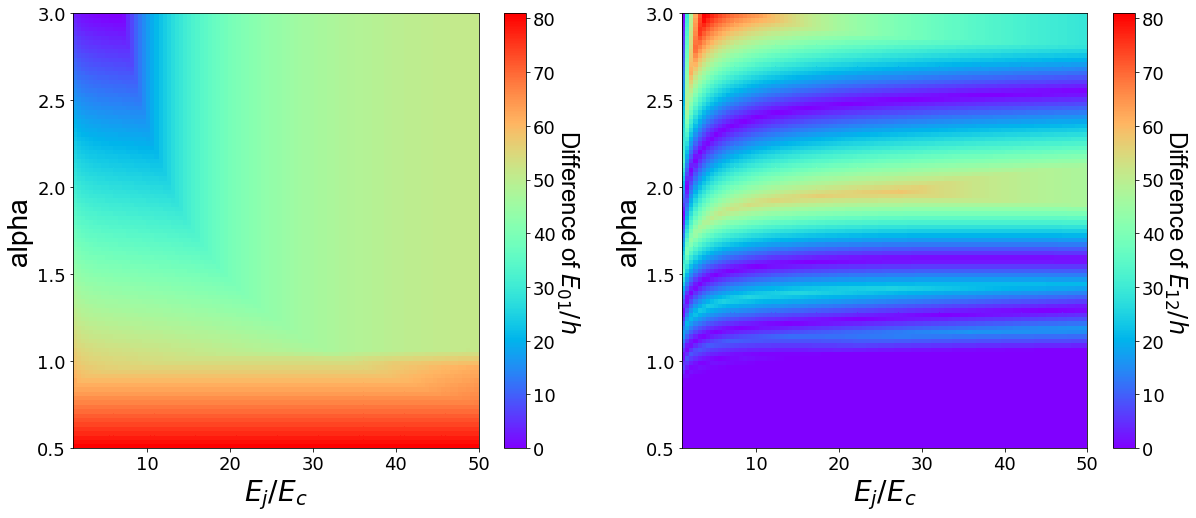

In [46]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

p = axes[0].pcolor(ygrid, xgrid, zgrid0/1e9, cmap=cm.rainbow)
p = axes[1].pcolor(ygrid, xgrid, zgrid1/1e9, cmap=cm.rainbow)

axes[0].set_xlabel(r'$E_j/E_c$', fontsize=28, **hfont)
axes[0].set_ylabel(r'alpha', fontsize=28, **hfont)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
#axes[0].set_xticks(arange(-1, 1.1, 0.5));
axes[0].axis('tight')

axes[1].set_xlabel(r'$E_j/E_c$', fontsize=28, **hfont)
axes[1].set_ylabel(r'alpha', fontsize=28, **hfont)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
#axes[1].set_xticks(arange(-1, 1.1, 0.5));
axes[1].axis('tight')



cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'Difference of $E_{01}/h$', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'Difference of $E_{12}/h$', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 



#plt.gcf().set_size_inches(20,8)
#plt.savefig("C:/neon/twin qubits/variable_alpha_EjEc_2.pdf", bbox_inches="tight")

# Stability diagram

In [66]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie1 = QVariable('φe1')
phie2 = QVariable('φe2')

phix.create_grid(10, 1)
phiy.create_grid(10, 1)
phiz.create_grid(10, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie1)
FQ3JJ.add_variable(phie2)

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe1', 'φe2'], 
                       np.asarray([[0,0,0,0,0], [0,0,1,0,0], [1,0,0,-1,0], [1,0,0,0,0], [0,1,0,0,0], [1,0,0,0,1]]))


alpha = 1.1
flux_steps = 200
energies = np.zeros((flux_steps,flux_steps,4), dtype=np.float)

Ej = 141e9
Ec = 2*1.9e-19**2/3.5e-15/(2*np.pi*1.054e-34)
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(2/Ec)
FQ3JJ.find_element('CB').set_capacitance(2/Ec)
FQ3JJ.find_element('CD').set_capacitance(2/Ec)
FQ3JJ.find_element('CE').set_capacitance(2/Ec)
FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
FQ3JJ.find_element('CC').set_capacitance(2*alpha/Ec)

phi_range1 = np.linspace(-2*np.pi, 2*np.pi, flux_steps)
phi_range2 = np.linspace(-2*np.pi, 2*np.pi, flux_steps)

#for j in range(flux_steps):
#    for i in range(3):
#        phie1.set_parameter(phi_range1[j], 0)
#        phie2.set_parameter(phi_range1[j+i-1], 0)
#        FQ3JJ.calculate_potentials()
#        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
#        energies[j, i, :] = eigenenergies

for phie1_id, phie1_value in enumerate(phi_range1):
    for phie2_id, phie2_value in enumerate(phi_range2):
        phie1.set_parameter(phie1_value, 0)
        phie2.set_parameter(phie2_value, 0)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
        energies[phie1_id, phie2_id, :] = eigenenergies
    print (phie1_id)

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:67: ComplexWarning: Casting complex values to real discards the imaginary part


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [67]:
# Создаем двумерную матрицу-сетку
xgrid, ygrid = np.meshgrid(phi_range1/np.pi/2,phi_range2/np.pi/2)

# В узлах рассчитываем значение функции
zgrid0 = xgrid+ygrid
zgrid1 = xgrid+ygrid
zgrid2 = xgrid+ygrid
zgrid3 = xgrid+ygrid
zgrid4 = xgrid+ygrid
zgrid5 = xgrid+ygrid

In [68]:
for i in arange (0, flux_steps-1, 1):
    for j in arange (0, flux_steps-1, 1):
        zgrid0[j][i]=energies[i,j,0]
        zgrid1[j][i]=energies[i,j,1]
        zgrid2[j][i]=energies[i,j,1]-energies[i,j,0]
        zgrid3[j][i]=energies[i,j,2]
        zgrid4[j][i]=energies[i,j,3]
        zgrid5[j][i]=energies[i,j,2]-energies[i,j,1]

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker

import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle

import numpy as np

In [70]:
x1=arange (-0.8, 0.8, 0.01)
x2=arange (-0.4, 0.4, 0.01)


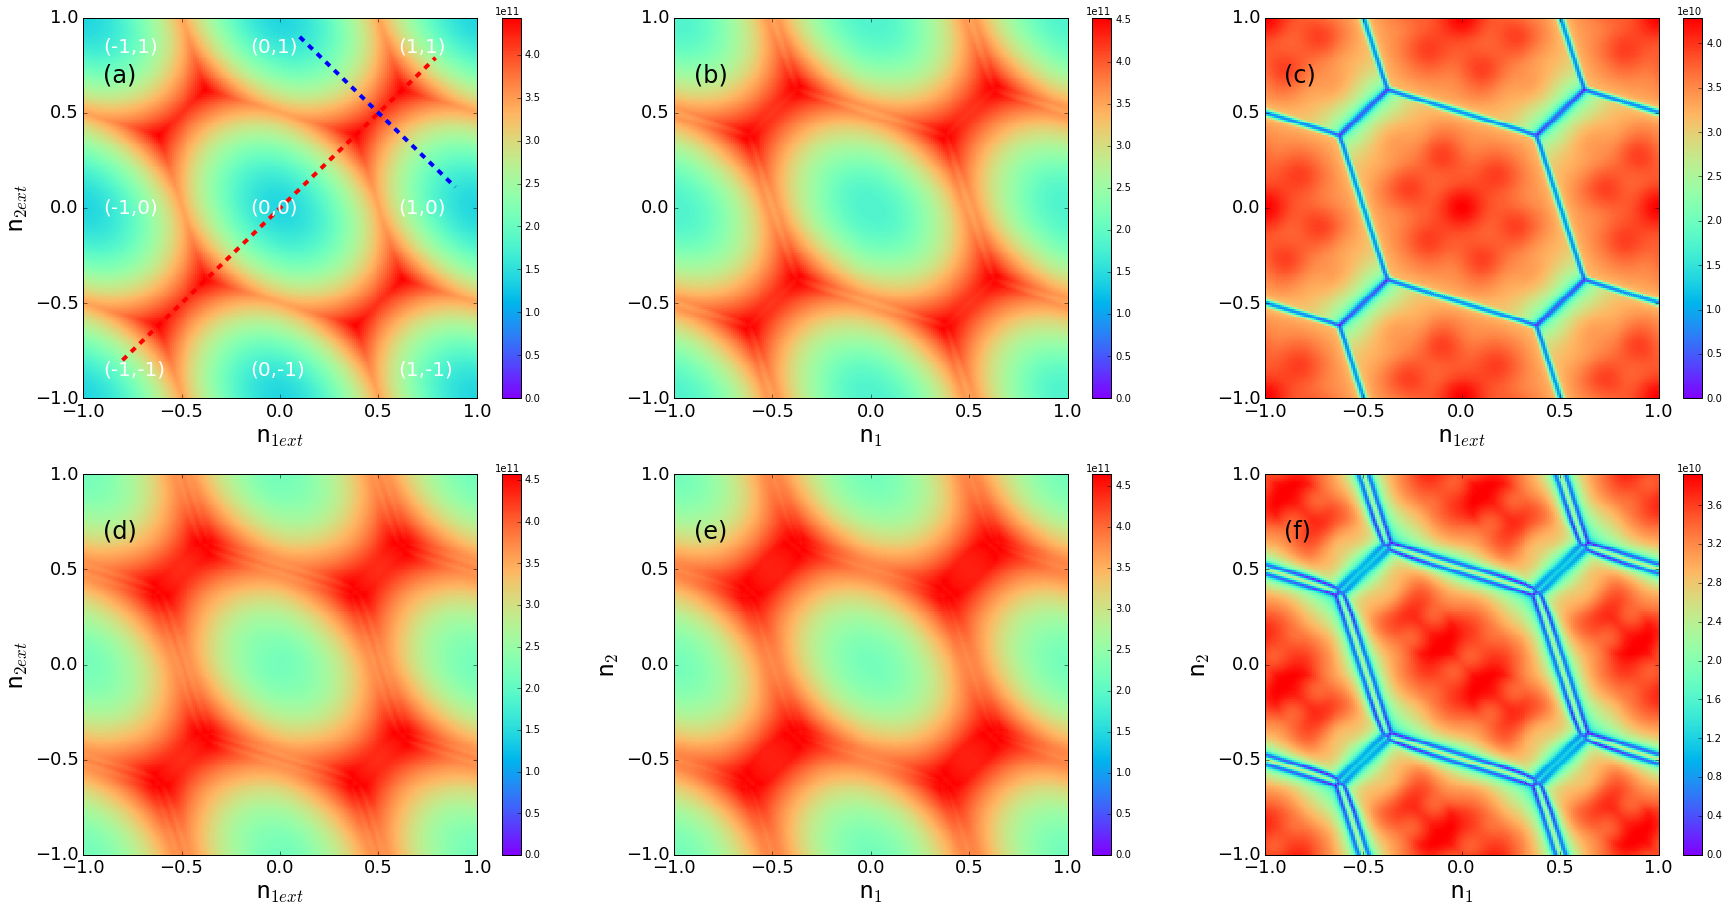

In [71]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(2, 3, figsize=(30, 15))

#plt.ylim(xgrid.min(),xgrid.max())
#plt.xlim(ygrid.min(),ygrid.max())

p = axes[0,0].pcolor(ygrid, xgrid, zgrid0, cmap=cm.rainbow,  vmin=zgrid0.min(), vmax=zgrid0.max())
cb = fig.colorbar(p, ax=axes[0,0])
axes[0,0].set_xlabel(r'n$_{1ext}$', fontsize=24, **hfont)
axes[0,0].set_ylabel(r'n$_{2ext}$', fontsize=24, **hfont)
axes[0,0].tick_params(axis='x', labelsize=18)
axes[0,0].tick_params(axis='y', labelsize=18)
axes[0,0].set_xticks(arange(-1, 1.1, 0.5));
axes[0,0].set_xticks(arange(-1, 1.1, 0.5));
axes[0,0].axis('tight')
axes[0,0].text(-0.9, 0.7,'(a)', fontsize=24, verticalalignment='center')


axes[0,0].text(-0.15, -0,r'(0,0)', color ='w', fontsize=20, verticalalignment='center')
axes[0,0].text(-0.15, -0.85,r'(0,-1)', color ='w', fontsize=20, verticalalignment='center')
axes[0,0].text(-0.15, 0.85,r'(0,1)', color ='w', fontsize=20, verticalalignment='center')

axes[0,0].text(0.60, -0,r'(1,0)', color ='w', fontsize=20, verticalalignment='center')
axes[0,0].text(0.60, -0.85,r'(1,-1)', color ='w', fontsize=20, verticalalignment='center')
axes[0,0].text(0.60, 0.85,r'(1,1)', color ='w', fontsize=20, verticalalignment='center')

axes[0,0].text(-0.9, -0,r'(-1,0)', color ='w', fontsize=20, verticalalignment='center')
axes[0,0].text(-0.9, -0.85,r'(-1,-1)', color ='w', fontsize=20, verticalalignment='center')
axes[0,0].text(-0.9, 0.85,r'(-1,1)', color ='w', fontsize=20, verticalalignment='center')

axes[0,0].plot(x1,x1, '--r' , linewidth=4.0)
axes[0,0].plot(x2+0.5,-x2+0.5, '--b' , linewidth=4.0)


p = axes[0,1].pcolor(ygrid, xgrid, zgrid1, cmap=cm.rainbow,  vmin=zgrid1.min(), vmax=zgrid1.max())
cb = fig.colorbar(p, ax=axes[0,1])
axes[0,1].set_xlabel(r'n$_1$', fontsize=24, **hfont)
#axes[0,1].set_ylabel(r'n$_2$', fontsize=24, **hfont)
axes[0,1].tick_params(axis='x', labelsize=18)
axes[0,1].tick_params(axis='y', labelsize=18)
axes[0,1].set_xticks(arange(-1, 1.1, 0.5));
axes[0,1].set_xticks(arange(-1, 1.1, 0.5));
axes[0,1].axis('tight')
axes[0,1].text(-0.9, 0.7,'(b)', fontsize=24, verticalalignment='center')

p = axes[0,2].pcolor(ygrid, xgrid, zgrid2, cmap=cm.rainbow,  vmin=zgrid2.min(), vmax=zgrid2.max())
cb = fig.colorbar(p, ax=axes[0,2])
axes[0,2].set_xlabel(r'n$_{1ext}$', fontsize=24, **hfont)
#axes[0,2].set_ylabel(r'n$_{2ext}$', fontsize=24, **hfont)
axes[0,2].set_xticks(arange(-1, 1.1, 0.5));
axes[0,2].set_xticks(arange(-1, 1.1, 0.5));
axes[0,2].tick_params(axis='x', labelsize=18)
axes[0,2].tick_params(axis='y', labelsize=18)
axes[0,2].axis('tight')
axes[0,2].text(-0.9, 0.7,'(c)', fontsize=24, verticalalignment='center')

p = axes[1,0].pcolor(ygrid, xgrid, zgrid3, cmap=cm.rainbow,  vmin=zgrid3.min(), vmax=zgrid3.max())
cb = fig.colorbar(p, ax=axes[1,0])
axes[1,0].set_xlabel(r'n$_{1ext}$', fontsize=24, **hfont)
axes[1,0].set_ylabel(r'n$_{2ext}$', fontsize=24, **hfont)
axes[1,0].set_xticks(arange(-1, 1.1, 0.5));
axes[1,0].set_xticks(arange(-1, 1.1, 0.5));
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].tick_params(axis='y', labelsize=18)
axes[1,0].axis('tight')
axes[1,0].text(-0.9, 0.7,'(d)', fontsize=24, verticalalignment='center')

p = axes[1,1].pcolor(ygrid, xgrid, zgrid4, cmap=cm.rainbow,  vmin=zgrid4.min(), vmax=zgrid4.max())
cb = fig.colorbar(p, ax=axes[1,1])
axes[1,1].set_xlabel(r'n$_1$', fontsize=24, **hfont)
axes[1,1].set_ylabel(r'n$_2$', fontsize=24, **hfont)
axes[1,1].set_xticks(arange(-1, 1.1, 0.5));
axes[1,1].set_xticks(arange(-1, 1.1, 0.5));
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].tick_params(axis='y', labelsize=18)
axes[1,1].axis('tight')
axes[1,1].text(-0.9, 0.7,'(e)', fontsize=24, verticalalignment='center')

p = axes[1,2].pcolor(ygrid, xgrid, zgrid5, cmap=cm.rainbow,  vmin=zgrid5.min(), vmax=zgrid5.max())
cb = fig.colorbar(p, ax=axes[1,2])
axes[1,2].set_xlabel(r'n$_1$', fontsize=24, **hfont)
axes[1,2].set_ylabel(r'n$_2$', fontsize=24, **hfont)
axes[1,2].set_xticks(arange(-1, 1.1, 0.5));
axes[1,2].set_xticks(arange(-1, 1.1, 0.5));
axes[1,2].tick_params(axis='x', labelsize=18)
axes[1,2].tick_params(axis='y', labelsize=18)
axes[1,2].axis('tight')
axes[1,2].text(-0.9, 0.7,'(f)', fontsize=24, verticalalignment='center')

#plt.gcf().set_size_inches(20,5)
#plt.savefig("C:/neon/Rainbow.pdf", bbox_inches="tight")


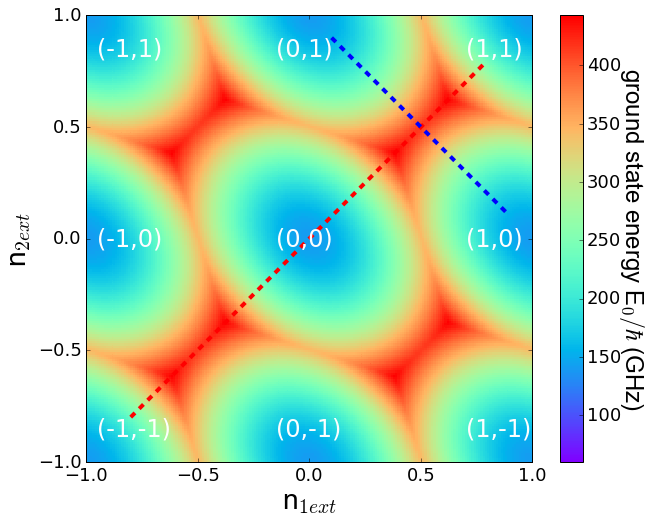

In [72]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

#plt.ylim(xgrid.min(),xgrid.max())
#plt.xlim(ygrid.min(),ygrid.max())

p = axes.pcolor(ygrid, xgrid, zgrid0/1e9, cmap=cm.rainbow,  vmin=60, vmax=zgrid0.max()/1e9)

axes.set_xlabel(r'n$_{1ext}$', fontsize=28, **hfont)
axes.set_ylabel(r'n$_{2ext}$', fontsize=28, **hfont)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)
axes.set_xticks(arange(-1, 1.1, 0.5));
#axes.set_xticks(arange(-1, 1.1, 0.5));
axes.axis('tight')

#axes.text(-0.9, 0.7,'(a)', fontsize=24, verticalalignment='center')


axes.text(-0.15, -0,r'(0,0)', color ='w', fontsize=24, verticalalignment='center')
axes.text(-0.15, -0.85,r'(0,-1)', color ='w', fontsize=24, verticalalignment='center')
axes.text(-0.15, 0.85,r'(0,1)', color ='w', fontsize=24, verticalalignment='center')

axes.text(0.70, -0,r'(1,0)', color ='w', fontsize=24, verticalalignment='center')
axes.text(0.70, -0.85,r'(1,-1)', color ='w', fontsize=24, verticalalignment='center')
axes.text(0.70, 0.85,r'(1,1)', color ='w', fontsize=24, verticalalignment='center')

axes.text(-0.95, -0,r'(-1,0)', color ='w', fontsize=24, verticalalignment='center')
axes.text(-0.95, -0.85,r'(-1,-1)', color ='w', fontsize=24, verticalalignment='center')
axes.text(-0.95, 0.85,r'(-1,1)', color ='w', fontsize=24, verticalalignment='center')

axes.plot(x1,x1, '--r' , linewidth=4.0)
axes.plot(x2+0.5,-x2+0.5, '--b' , linewidth=4.0)

#plt.plot([0, 0.33, 0.5], [0, 0.33, 0.5], 'bs', linewidth=10.0)

cb = fig.colorbar(p, ax=axes)
cb.set_label('ground state energy E$_{0}/\hbar$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

#colorbar().ax.tick_params(axis='y', direction='out')


#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/neon/stability.pdf", bbox_inches="tight")

# Crossection

In [5]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

In [10]:
d2 = np.zeros(498)
Z_total = np.zeros(498)
S21_total = np.zeros(498)
for i in arange(1, 498, 1):
    d2[i] = 1/(zgrid0[2, 499-i]+zgrid0[0,497-i]-2*zgrid0[1, 498-i])
    #Z_total[i] = (d2[i]*10e9*1j) 
    #S21_total[i] = 20*np.log(2*50/(d2[i]*15+2*50))
    
Z_total[0]=Z_total[1]



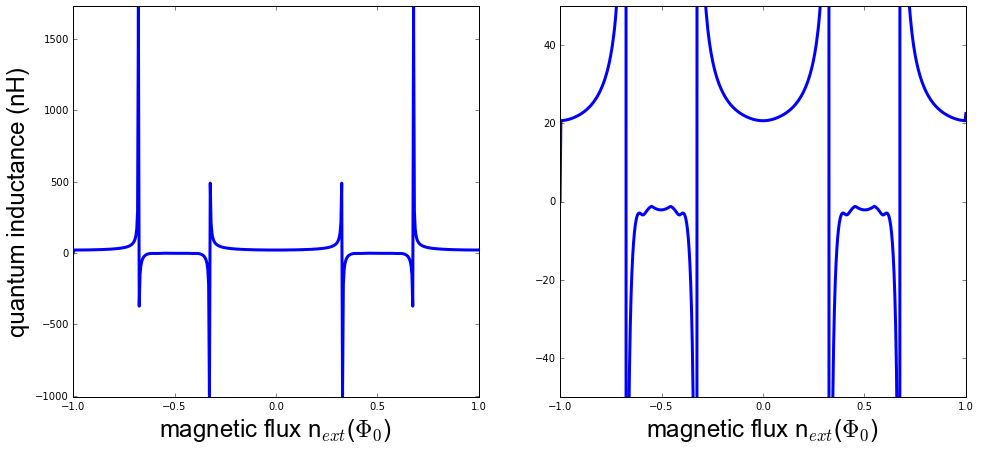

In [19]:
phi_range1 = np.linspace(-2*np.pi, 2*np.pi, 498)
    
#fig, axes = plt.subplots(figsize=(10, 8))
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].plot(phi_range1/2/np.pi,d2*1e9, linewidth=3.0)
axes[0].set_ylabel(r'quantum inductance (nH)', fontsize=24, **hfont)
axes[0].axis('tight')
axes[0].set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)

axes[1].plot(phi_range1/2/np.pi,d2*1e9, linewidth=3.0)
axes[1].set_ylim(-50,50)
axes[1].set_xlim(-1,1)
axes[1].set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)

plt.show()

#axes[1].plot(Z_total)
#axes[2].plot(S21_total)

plt.gcf().set_size_inches(16,7)
plt.savefig("C:/neon/quantum_inductance.pdf", bbox_inches="tight")

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


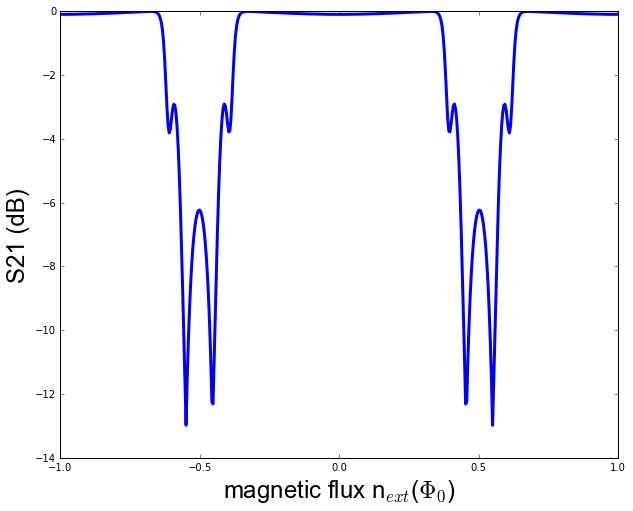

In [194]:
phi_range1 = np.linspace(-2*np.pi, 2*np.pi, 498)
    
fig, axes = plt.subplots(figsize=(10, 8))

#axes.plot(phi_range1/2/np.pi, 20*np.log(2*50/(d2*10e9*1j*15+2*50)), linewidth=3.0)
axes.plot(phi_range1/2/np.pi, 20*np.log(abs((-d2*10e9*1j*5)/(d2*10e9*1j*5+2*50))), linewidth=3.0)
#axes.set_ylim(-3,1)
#axes.set_xlim(-1,1)
axes.set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)
axes.set_ylabel(r'S21 (dB)', fontsize=24, **hfont)

plt.gcf().set_size_inches(10,8)
plt.savefig("C:/neon/15twnqubitss21.pdf", bbox_inches="tight")

# Astafiev fitting 

In [4]:
fo = open("Labcomp/pictures/Cross_section.txt", "r+")
data=fo.read().split()

s21 = []
currents = []
for y in range(1, 251,1):
    currents.append(double(data[2*y-2])*1000)
    s21.append(double(data[2*y-1]))
    
S=5.2e-6*3.1e-6
from scipy import constants
flux_quantum = constants.h/(2*constants.e) # веберы 

H=flux_quantum/2/S   
X_5=flux_quantum/2/S/0.35
possition=flux_quantum/(0.00015*S*2)

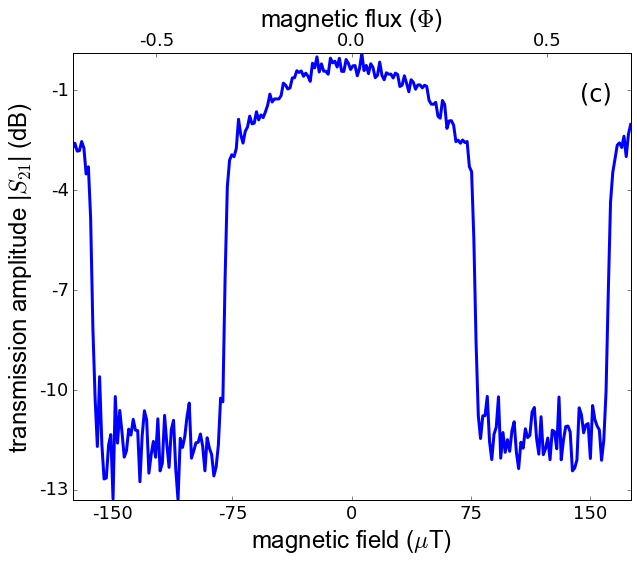

In [8]:
fig, axes = plt.subplots(figsize=(10, 8))
hfont = {'fontname':'Arial'}

# Создаем форматер
formatter = matplotlib.ticker.ScalarFormatter ()
formatter.set_powerlimits((-3, 1))

# Установка форматера для оси Y
axes.yaxis.set_major_formatter (formatter)
ax2 = axes.twiny()

p = axes.plot(currents, s21, linewidth=3.0)


axes.axis('tight')
axes.set_xlabel(r'magnetic field ($\mu$T)', fontsize=24, **hfont)
#axes.set_xlabel(r'Current(mA)', fontsize=24, **hfont)
axes.set_ylabel(r'transmission amplitude |$S_{21}$| (dB)', fontsize=24, **hfont)


new_tick_locations2 = np.array([.15, .5, .85])
#ax2.set_xlim((0,1))
new_tick_labels2 = np.array([- 0.5, 0, 0.5])

new_tick_locations = np.array([-8.5518, -4.2759, 0, 4.2759, 8.5518])
axes.set_xlim((-10,10))
new_tick_labels = np.array([- 150,-75, 0, 75, 150]) #mT

new_tick_locations_y = np.array([-1, -4, -7, -10, -13])
new_tick_labels_y = np.array([-1, -4, -7, -10, -13])

#plt.yticks(arange(-13, 1, 3));

axes.set_yticks(new_tick_locations_y)
axes.set_yticklabels(new_tick_labels_y)

axes.set_xticks(new_tick_locations)
axes.set_xticklabels(new_tick_labels)

ax2.set_xticks(new_tick_locations2)
ax2.set_xticklabels(new_tick_labels2)

ax2.set_xlabel(r"magnetic flux ($\Phi$)", fontsize=24, **hfont)

ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#cb1 = fig.colorbar(p1, ax=axes)
#cb1.set_label('transmission amplitude |$S_{21}$| (dB)', labelpad=25, rotation=270, fontsize=24, **hfont)
#cb2 = fig.colorbar(p1, ax=ax2)
#cb1.clear()
matplotlib.pyplot.text(0.91, 0.91,'(c)', fontsize=24, verticalalignment='center', transform=axes.transAxes)
#cb2.remove()

#axes.plot(x1*1e3,3*(log10(abs(s21_new_ferro_m1))/2+log10(abs(-s21_new_anti_m1))/2)-7,'r--', linewidth=3.0)
#axes.plot(x2*1e3,20*log10(s21_new_anti)+11.9,'r--', linewidth=3.0)
#axes.plot(-x1*1e3,3*(log10(abs(s21_new_ferro_m1))/2+log10(abs(-s21_new_anti_m1))/2)-7,'r--', linewidth=3.0)

#axes.plot(x2*1e3-14,20*log10(s21_new_anti)+11.9,'r--', linewidth=3.0)
#axes.plot(x2*1e3+14,20*log10(s21_new_anti)+11.9,'r--', linewidth=3.0)

#axes.plot([-9.3,-9.3],[20*log10(s21_new_anti[-1])+11.9,3*(log10(abs(s21_new_ferro_m1[-1]))/2+log10(abs(-s21_new_anti_m1[-1]))/2)-7],'r--', linewidth=3.0)
#axes.plot([-4.7,-4.7],[20*log10(s21_new_anti[-1])+11.9,3*(log10(abs(s21_new_ferro_m1[1]))/2+log10(abs(-s21_new_anti_m1[1]))/2)-7],'r--', linewidth=3.0)

#axes.plot([9.3,9.3],[20*log10(s21_new_anti[-1])+11.9,3*(log10(abs(s21_new_ferro_m1[-1]))/2+log10(abs(-s21_new_anti_m1[-1]))/2)-7],'r--', linewidth=3.0)
#axes.plot([4.7,4.7],[20*log10(s21_new_anti[-1])+11.9,3*(log10(abs(s21_new_ferro_m1[1]))/2+log10(abs(-s21_new_anti_m1[1]))/2)-7],'r--', linewidth=3.0)


##axes.plot(x1*1e3,16+20*log10(abs(s21_new_ferro_m1))/2+20*log10(abs(-s21_new_anti_m1))/2,'r--', linewidth=3.0)
##axes.plot(x2*1e3,12+20*log10(s21_new_anti),'r--', linewidth=3.0)
##axes.plot(-x1*1e3,16+20*(log10(abs(s21_new_ferro_m1))/2+log10(abs(-s21_new_anti_m1))/2),'r--', linewidth=3.0)

##axes.plot(x2*1e3-14,12+20*log10(s21_new_anti),'r--', linewidth=3.0)
##axes.plot(x2*1e3+14,12+20*log10(s21_new_anti),'r--', linewidth=3.0)

##axes.plot([-9.3,-9.3],[12+20*log10(s21_new_anti[-1]),12+20*(log10(abs(s21_new_ferro_m1[-1]))/2+log10(abs(-s21_new_anti_m1[-1]))/2)],'r--', linewidth=3.0)
##axes.plot([-4.7,-4.7],[12+20*log10(s21_new_anti[-1]),12+20*(log10(abs(s21_new_ferro_m1[1]))/2+log10(abs(-s21_new_anti_m1[1]))/2)],'r--', linewidth=3.0)

##axes.plot([9.3,9.3],[12+20*log10(s21_new_anti[-1]),12+20*(log10(abs(s21_new_ferro_m1[-1]))/2+log10(abs(-s21_new_anti_m1[-1]))/2)],'r--', linewidth=3.0)
##axes.plot([4.7,4.7],[12+20*log10(s21_new_anti[-1]),12+20*(log10(abs(s21_new_ferro_m1[1]))/2+log10(abs(-s21_new_anti_m1[1]))/2)],'r--', linewidth=3.0)

#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/neon/fig2c.pdf", bbox_inches="tight")

In [50]:
L_sup = -4.26e-6
L_zero = 1.13e-7
number_of_qubits = 1

In [51]:
S21_sup = 20*np.log(2*50/(abs(L_sup*10e9*1j*number_of_qubits)+2*50))
print (S21_sup)
S21_zero = 20*np.log(2*50/(abs(L_zero*10e9*1j*number_of_qubits)+2*50))
print (S21_zero)

-121.135680265
-50.1919852476


In [52]:
abs(L_zero*10e9*1j*number_of_qubits)

1130.0

In [34]:
S21_sup - S21_zero

-70.943695017005055

In [ ]:
phi_range1 = np.linspace(-2*np.pi, 2*np.pi, 498)
    
fig, axes = plt.subplots(figsize=(10, 8))

axes.plot(phi_range1/2/np.pi, 20*np.log(2*50/(d2*10e9*1j*15+2*50)), linewidth=3.0)
#axes.plot(phi_range1/2/np.pi, 20*np.log(abs((-d2*10e9*1j*5)/(d2*10e9*1j*5+2*50))), linewidth=3.0)
#axes.set_ylim(-3,1)
#axes.set_xlim(-1,1)
axes.set_xlabel(r'magnetic flux n$_{ext}$($\Phi_0$)', fontsize=24, **hfont)
axes.set_ylabel(r'S21 (dB)', fontsize=24, **hfont)

# Some non-relevant rubbish

In [40]:
induct_neg = -1e-10
induct_pos = 4.2e-9
#2.86e-9

In [56]:
qubits_number = 15

In [57]:
2*np.pi*induct_pos*10e9

263.89378290154264

In [58]:
2*np.pi*induct_neg*10e9

-6.283185307179587

In [59]:
20*np.log(abs((-2*np.pi*induct_pos*10e9*1j*qubits_number)/(2*np.pi*induct_pos*10e9*1j*qubits_number+2*50)))

-0.0063799990946210097

In [60]:
20*np.log(abs((-2*np.pi*induct_neg*10e9*1j*qubits_number)/(2*np.pi*induct_neg*10e9*1j*qubits_number+2*50)))

-7.5414393517781892

In [61]:
20*np.log(abs((-2*np.pi*induct_pos*10e9*1j*qubits_number)/(2*np.pi*induct_pos*10e9*1j*qubits_number+2*50))) - 20*np.log(abs((-2*np.pi*induct_neg*10e9*1j*qubits_number)/(2*np.pi*induct_neg*10e9*1j*qubits_number+2*50)))

7.5350593526835681

In [164]:
20*np.log(2*50/(d2[50]*10e9*1j*15+2*50)) - 20*np.log(2*50/(d2[100]*10e9*1j*15+2*50))

(12.872277913658577+21.406331892694993j)

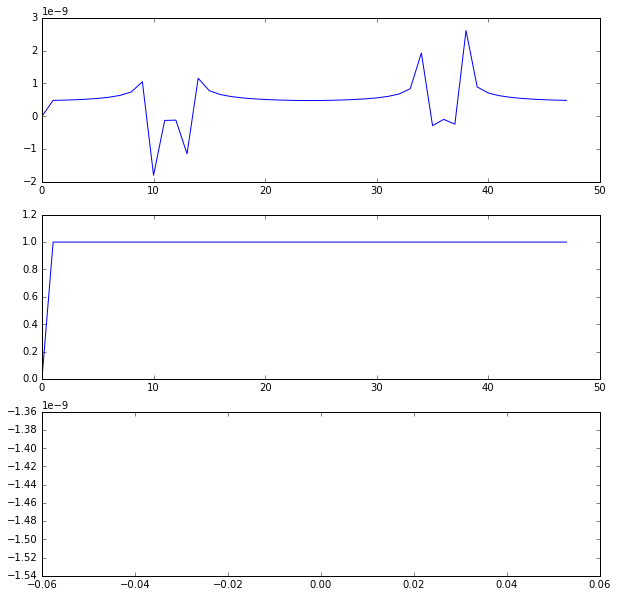

In [70]:
d2 = np.zeros(48)
Z_total = np.zeros(48)
S21_total = np.zeros(48)
for i in arange(1, 48, 1):
    d2[i] = 1/(zgrid0[2, 49-i]+zgrid0[0,47-i]-2*zgrid0[1, 48-i])
    Z_total[i] = 2*50/(d2[i]+2*50)
    S21_total = 20*np.log(2*50/(d2[i]*15+2*50))
    
    
    
fig, axes = plt.subplots(nrows=3,  figsize=(10, 10))

axes[0].plot(d2)

axes[1].plot(Z_total)
axes[2].plot(S21_total)

plt.show()


In [65]:
d2[25]

4.8143228384906142e-10

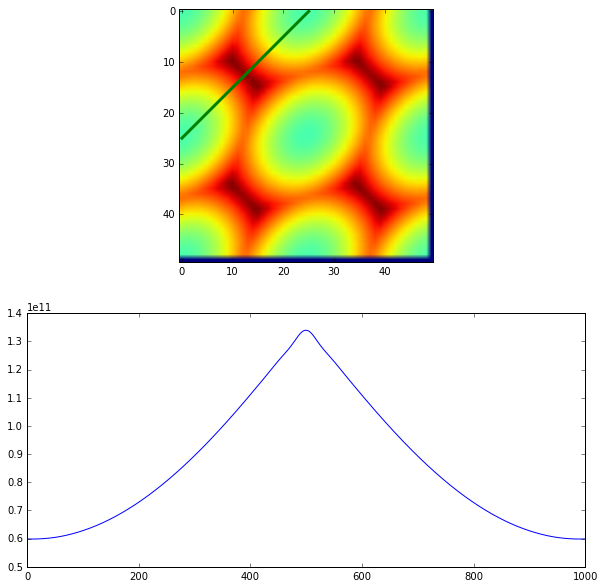

In [19]:
x0, y0 = 0, 25 # These are in _pixel_ coordinates!!
x1, y1 = 25, 0
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(nrows=2,  figsize=(10, 10))
axes[0].imshow(zgrid0)
axes[0].plot([x0, x1], [y0, y1], 'g', linewidth=3.0)
axes[0].axis('image')

axes[1].plot(zi)

plt.show()


# Производная

In [20]:
first_derivative = np.gradient(zi)
second_derivative = np.gradient(first_derivative)

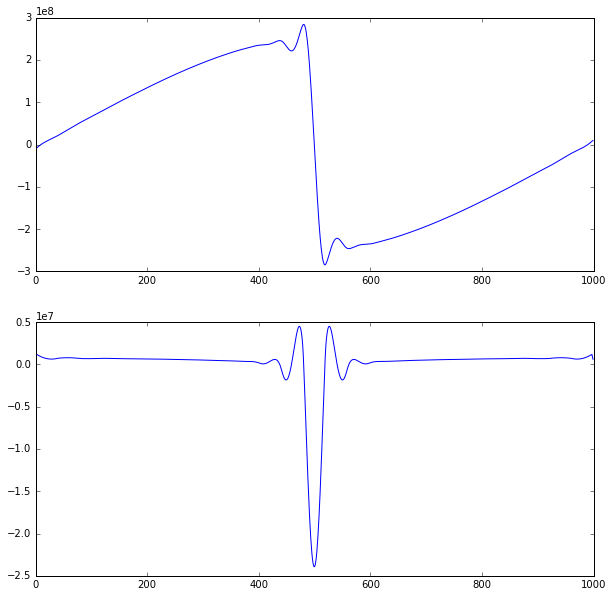

In [21]:
fig, axes = plt.subplots(nrows=2,  figsize=(10, 10))
axes[0].plot(first_derivative)
axes[1].plot(second_derivative)
plt.show()

# Measure L from curvature 

In [66]:
Induct = []
Z_total = []
S21_total = []

num = 1000
for i in arange (20, 80, 1):
    x0, y0 = 0, i 
    x1, y1 = i, 0
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))
    
    first_derivative = np.gradient(zi)
    second_derivative = np.gradient(first_derivative)
    
    Induct.append(1/second_derivative[500])
    Z_total.append(2*50/(second_derivative[500]*10e9+2*50))
    S21_total.append(20*np.log(2*50/(second_derivative[500]*10e9+2*50)*15))

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in log


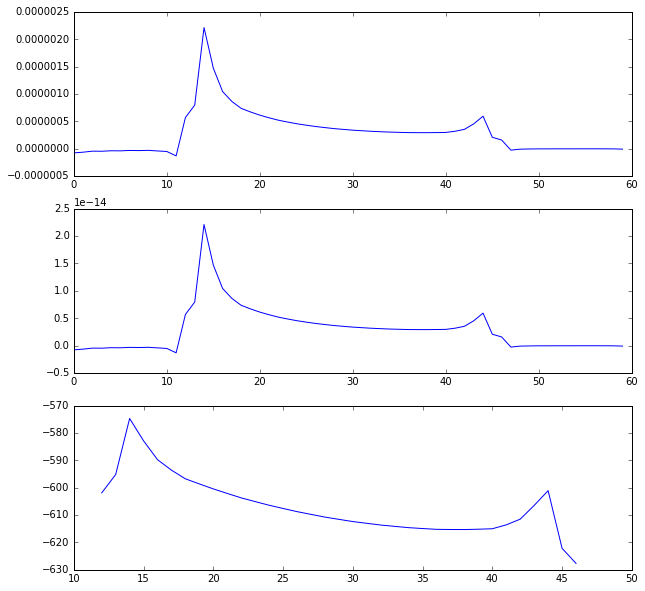

In [67]:
#-- Plot...
fig, axes = plt.subplots(nrows=3,  figsize=(10, 10))

axes[0].plot(Induct)

axes[1].plot(Z_total)
axes[2].plot(S21_total)

plt.show()


In [53]:
Z_total

[-7.8939895844444977e-16,
 -6.6229979798760249e-16,
 -4.7640160997755909e-16,
 -4.9151124524719543e-16,
 -4.0085479082442909e-16,
 -4.1808053984264506e-16,
 -3.4127181449693151e-16,
 -3.703876452376207e-16,
 -3.2635164493204867e-16,
 -4.3447924260997761e-16,
 -5.3622195060305962e-16,
 -1.3344833566549072e-15,
 5.680760351762191e-15,
 7.9434774341979713e-15,
 2.2117364951768759e-14,
 1.4700992925343237e-14,
 1.0419411556498939e-14,
 8.6024120727830844e-15,
 7.3421041043823148e-15,
 6.6891356690776438e-15,
 6.1069608879861462e-15,
 5.6203847559262023e-15,
 5.1845151940327865e-15,
 4.8425655590755869e-15,
 4.5297209675981335e-15,
 4.2715031178169792e-15,
 4.031678993897549e-15,
 3.8336751537751803e-15,
 3.647652495955176e-15,
 3.5009663996014438e-15,
 3.3617271005231927e-15,
 3.2558974915926853e-15,
 3.1550839605474967e-15,
 3.0793158413219274e-15,
 3.0075778037899779e-15,
 2.9599666151043601e-15,
 2.9166583298934622e-15,
 2.9078848777847927e-15,
 2.9048456690558398e-15,
 2.92280949737624

In [202]:
1/second_derivative[500]

-1.3103957841211111e-07

# Цикличное вычисление индуктивности

In [242]:
num = 1000
inductivity = []

for i in arange(1,1000,1):
    x0, y0 = i, 0            # These are in _pixel_ coordinates!!
    x1, y1 = 0, i
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)   
    zi = scipy.ndimage.map_coordinates(zgrid0, np.vstack((x,y)))   # Extract the values along the line, using cubic interpolation
    first_derivative = np.gradient(zi)
    second_derivative = np.gradient(first_derivative)
    inductivity.append(1/second_derivative[500])

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars


In [243]:
impedance = inductivity[50]*10e9

In [244]:
impedance 

35188.42187520118

In [245]:
S21 = 2*50/(impedance +2*50)

In [246]:
S21

0.0028337906510428187

# Tunable alpha

In [3]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')

phix.create_grid(12, 1)
phiy.create_grid(12, 1)
phiz.create_grid(12, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

In [34]:
alpha_steps = 200
flux_steps = 200

alpha_range = np.linspace (0.7, 1.5, alpha_steps)
alpha_id = np.linspace(1,alpha_steps, alpha_steps)

phi_range = np.linspace(0*np.pi/2, 2*np.pi/2, flux_steps)
phi_id = np.linspace(1,flux_steps,flux_steps)

energies = np.zeros((flux_steps,4), dtype=np.float)
energies_alpha = np.zeros((alpha_steps,flux_steps,4), dtype=np.float)

In [35]:
Ej = 200e9
Ec = 2*1.9e-19**2/(3.5e-15)/(2*np.pi*1.054e-34)
FQ3JJ.find_element('JJA').set_critical_current(Ej)
FQ3JJ.find_element('JJB').set_critical_current(Ej)
FQ3JJ.find_element('JJD').set_critical_current(Ej)
FQ3JJ.find_element('JJE').set_critical_current(Ej)
FQ3JJ.find_element('CA').set_capacitance(2/Ec)
FQ3JJ.find_element('CB').set_capacitance(2/Ec)
FQ3JJ.find_element('CD').set_capacitance(2/Ec)
FQ3JJ.find_element('CE').set_capacitance(2/Ec)

for i in alpha_id:
    FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha_range[i-1])
    FQ3JJ.find_element('CC').set_capacitance(2*alpha_range[i-1]/Ec)
    
    for phie_id, phie_value in enumerate(phi_range):
        phie.set_parameter(phie_value, 0)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
        energies_alpha[i-1, phie_id, :] = eigenenergies
    print (i)

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.

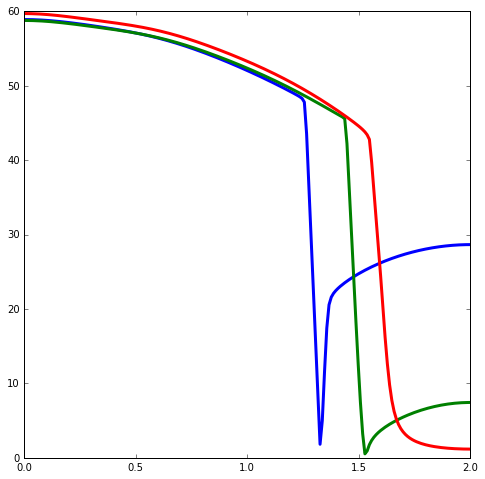

In [50]:
fig, axes = plt.subplots(figsize=(8, 8))
plt.plot(np.linspace(0, 2, flux_steps), (energies_alpha[1,:,1]-energies_alpha[1,:,0])/1e9, linewidth=3.0)
plt.plot(np.linspace(0, 2, flux_steps), (energies_alpha[100,:,1]-energies_alpha[100,:,0])/1e9, linewidth=3.0)
plt.plot(np.linspace(0, 2, flux_steps), (energies_alpha[199,:,1]-energies_alpha[199,:,0])/1e9, linewidth=3.0)


C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


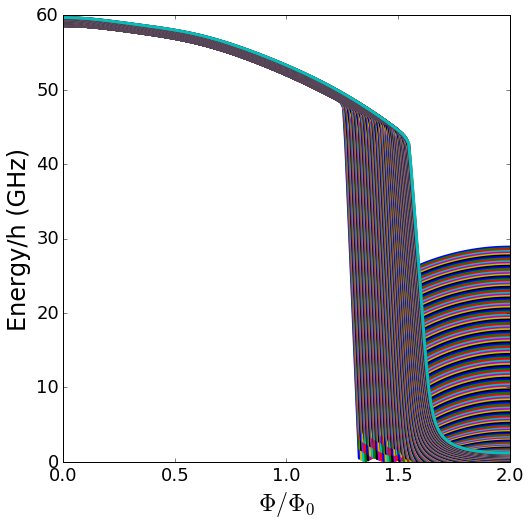

In [39]:
fig, axes = plt.subplots(figsize=(8, 8))
for i in alpha_id:
    plt.plot(np.linspace(0, 2, flux_steps), (energies_alpha[i-1,:,1]-energies_alpha[i-1,:,0])/1e9, linewidth=3.0)
    

axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Energy/h (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

In [36]:
PHI_r, ALP_r = np.meshgrid(phi_range, alpha_range)
PHI_id, ALP_id = np.meshgrid(phi_id, alpha_id)

In [37]:
U =  np.zeros((alpha_steps,flux_steps), dtype=np.float)

for i in alpha_id:
    for j in phi_id:
        U[i-1][j-1] = ((energies_alpha[i-1,j-1,2]-energies_alpha[i-1,j-1,1]))
        print (i , j)

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.0 1.0
1.0 2.0
1.0 3.0
1.0 4.0
1.0 5.0
1.0 6.0
1.0 7.0
1.0 8.0
1.0 9.0
1.0 10.0
1.0 11.0
1.0 12.0
1.0 13.0
1.0 14.0
1.0 15.0
1.0 16.0
1.0 17.0
1.0 18.0
1.0 19.0
1.0 20.0
1.0 21.0
1.0 22.0
1.0 23.0
1.0 24.0
1.0 25.0
1.0 26.0
1.0 27.0
1.0 28.0
1.0 29.0
1.0 30.0
1.0 31.0
1.0 32.0
1.0 33.0
1.0 34.0
1.0 35.0
1.0 36.0
1.0 37.0
1.0 38.0
1.0 39.0
1.0 40.0
1.0 41.0
1.0 42.0
1.0 43.0
1.0 44.0
1.0 45.0
1.0 46.0
1.0 47.0
1.0 48.0
1.0 49.0
1.0 50.0
1.0 51.0
1.0 52.0
1.0 53.0
1.0 54.0
1.0 55.0
1.0 56.0
1.0 57.0
1.0 58.0
1.0 59.0
1.0 60.0
1.0 61.0
1.0 62.0
1.0 63.0
1.0 64.0
1.0 65.0
1.0 66.0
1.0 67.0
1.0 68.0
1.0 69.0
1.0 70.0
1.0 71.0
1.0 72.0
1.0 73.0
1.0 74.0
1.0 75.0
1.0 76.0
1.0 77.0
1.0 78.0
1.0 79.0
1.0 80.0
1.0 81.0
1.0 82.0
1.0 83.0
1.0 84.0
1.0 85.0
1.0 86.0
1.0 87.0
1.0 88.0
1.0 89.0
1.0 90.0
1.0 91.0
1.0 92.0
1.0 93.0
1.0 94.0
1.0 95.0
1.0 96.0
1.0 97.0
1.0 98.0
1.0 99.0
1.0 100.0
1.0 101.0
1.0 102.0
1.0 103.0
1.0 104.0
1.0 105.0
1.0 106.0
1.0 107.0
1.0 108.0
1.0 109.0
1.0 110.0
1.0 111.

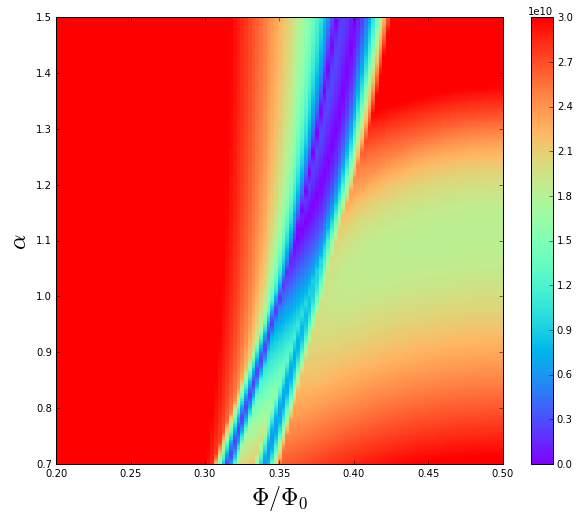

In [49]:
fig, axes = plt.subplots(figsize=(10, 8))


p = axes.pcolor(PHI_r/2/np.pi, ALP_r, U, cmap=cm.rainbow, vmin=0,  vmax = 30e9, rasterized=True)
axes.axis('tight')
axes.set_xlabel(r'$\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'$\alpha$', fontsize=24)

#axes.set_ylim((0.7, 1.4))
axes.set_xlim((0.2, 0.5))

cb = fig.colorbar(p, ax=axes)

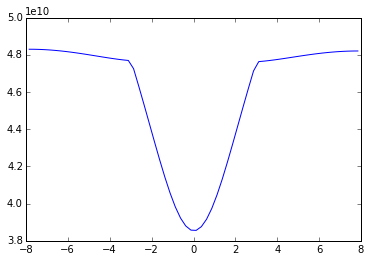

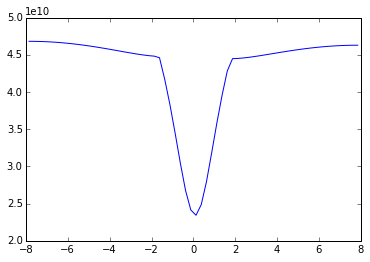

In [9]:
plt.figure (0)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,1]-energies_alpha[0,:,0])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,2]-energies_alpha[0,:,1])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,3]-energies_alpha[0,:,2])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,4]-energies_alpha[0,:,3])

plt.figure (1)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,1]-energies_alpha[1,:,0])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,2]-energies_alpha[1,:,1])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,3]-energies_alpha[1,:,2])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,4]-energies_alpha[1,:,3])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,5]-energies_alpha[1,:,4])
#plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,6]-energies_alpha[1,:,5])

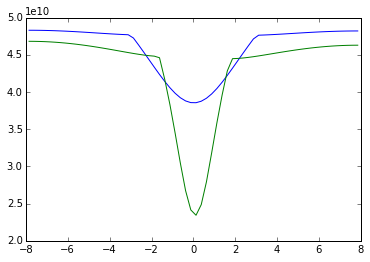

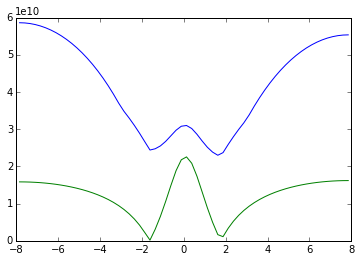

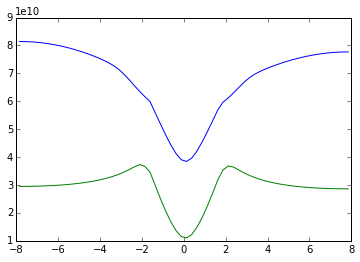

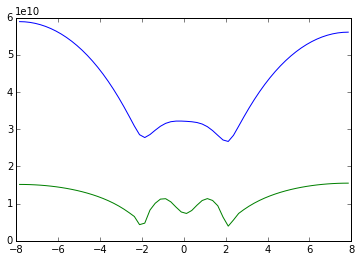

In [10]:
plt.figure (0)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,1]-energies_alpha[0,:,0])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,1]-energies_alpha[1,:,0])

plt.figure (1)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,2]-energies_alpha[1,:,1])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,2]-energies_alpha[1,:,1])

plt.figure (2)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,3]-energies_alpha[1,:,2])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,3]-energies_alpha[1,:,2])


plt.figure (3)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[0,:,4]-energies_alpha[1,:,3])
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), energies_alpha[1,:,4]-energies_alpha[1,:,3])

In [11]:
nomerr=20
anharm50 = ((energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])-(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0]))/(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0])
nomerr=0
anharm5 = ((energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])-(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0]))/(energies_alpha[nomerr,:,1]-energies_alpha[nomerr,:,0])

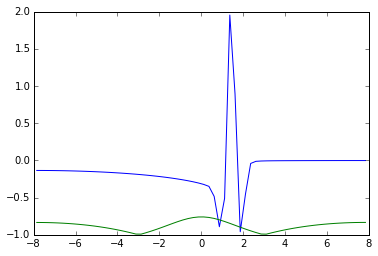

In [12]:
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm50)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm5)

In [26]:
nomerr=1
anharm20 = ((energies_alpha[nomerr,:,3]-energies_alpha[nomerr,:,2])-(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1]))/(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])
nomerr=0
anharm2 = ((energies_alpha[nomerr,:,3]-energies_alpha[nomerr,:,2])-(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1]))/(energies_alpha[nomerr,:,2]-energies_alpha[nomerr,:,1])

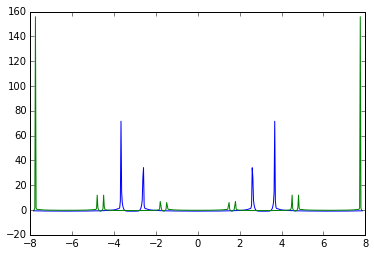

In [27]:
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm20)
plt.plot(np.linspace(-5*np.pi/2, 5*np.pi/2, flux_steps), anharm2)

In [71]:
Ej = 84e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)

In [75]:
Ec

21804529205.379208

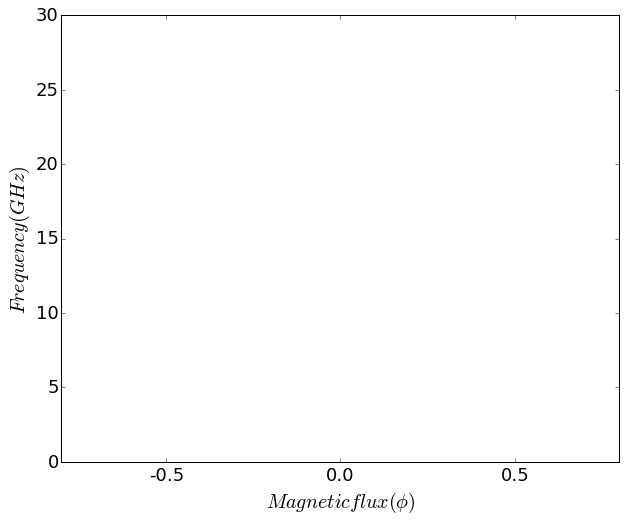

In [28]:
fig, axes = plt.subplots(figsize=(10, 8))
axes.set_xlim([-0.8, 0.8])
axes.set_ylim([0, 30])

p2 = axes.plot(phi_range/(2*np.pi), (energies[:,1]-energies[:,0])/1e9,'r')
#p2 = axes.plot(phi_range/(2*np.pi), (energies[:,2]-energies[:,1])/1e9,'g')
#p2 = axes.plot(phi_range/(2*np.pi), (energies[:,3]-energies[:,2])/1e9,'b')
#p2 = axes.plot(phi_range/(2*np.pi), (-(energies[:,1]-energies[:,0])+(energies[:,2]-energies[:,1]))/1e9,'r')
#p2 = axes.plot(phi_range/(2*np.pi), (-(energies[:,2]-energies[:,1])+(energies[:,3]-energies[:,2]))/1e9,'r')

axes.set_xlabel(r'$Magnetic flux (\phi)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

new_tick_locations = np.array([-.50, 0, .50])

new_tick_labels = np.array([-0.5, 0, 0.5])
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

axes.set_xticks(new_tick_locations)
axes.set_xticklabels(new_tick_labels)

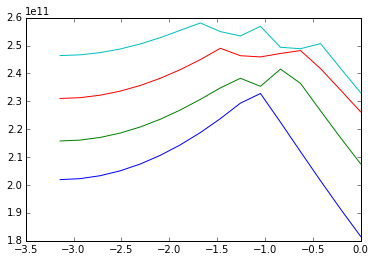

In [71]:
plt.plot(np.linspace(-np.pi, 0, flux_steps), energies)

In [36]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQ3JJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQ3JJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQ3JJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('CB'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQ3JJ.add_element(QCapacitance('CE'), ['4', '5'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phie = QVariable('φe')
#phix2 = QVariable('φx2')
phix.create_grid(24, 1)
phiy.create_grid(24, 1)
phiz.create_grid(24, 1)
FQ3JJ.add_variable(phix)
FQ3JJ.add_variable(phiy)
FQ3JJ.add_variable(phiz)
FQ3JJ.add_variable(phie)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,1]]))

#EjEc_ratio = 80
alpha = 0.72
#flux_steps = 3
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
Ej_steps = 21
energies = np.zeros((Ej_steps,4), dtype=np.float)
Ej_range = np.logspace(9, 11, Ej_steps)

#for phie_id, phie_value in enumerate(np.linspace(-np.pi, np.pi, flux_steps)):
for Ej_id, Ej in enumerate(Ej_range):
    #Ej = 25e9
    phie_value = np.pi
    Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
    FQ3JJ.find_element('JJA').set_critical_current(Ej)
    FQ3JJ.find_element('JJB').set_critical_current(Ej)
    FQ3JJ.find_element('JJD').set_critical_current(Ej)
    FQ3JJ.find_element('JJE').set_critical_current(Ej)
    FQ3JJ.find_element('CA').set_capacitance(2/Ec)
    FQ3JJ.find_element('CB').set_capacitance(2/Ec)
    FQ3JJ.find_element('CD').set_capacitance(2/Ec)
    FQ3JJ.find_element('CE').set_capacitance(2/Ec)
    FQ3JJ.find_element('JJC').set_critical_current(Ej*alpha)
    FQ3JJ.find_element('CC').set_capacitance(2*alpha/Ec)
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[Ej_id, :] = eigenenergies
    print('Ej_id: {0}, gap: {1:5.4g}'.format(Ej_id, eigenenergies[1]-eigenenergies[0]))

Ej_id: 0, gap: 1.087e+10+5.495e-05j


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:63: ComplexWarning: Casting complex values to real discards the imaginary part


KeyboardInterrupt: 

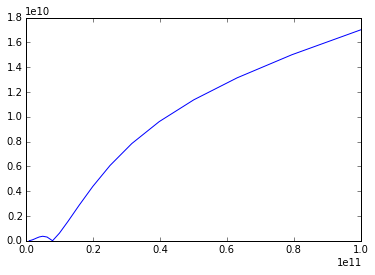

In [26]:
plt.plot(Ej_range, energies[:,1]-energies[:,0])

In [5]:
fo = open("fitting.grd-tab", "r+")
data=fo.read().split()
s21 = []
for y in range(1, 200001,1):
    s21.append(double(data[3*y-1]))
currents = np.arange (-10000e-6, 10000e-6, 80e-6)  #250
frequency = np.arange (6e9, 14e9, 1e7)  #800
s21 = np.reshape(s21, (800,250))

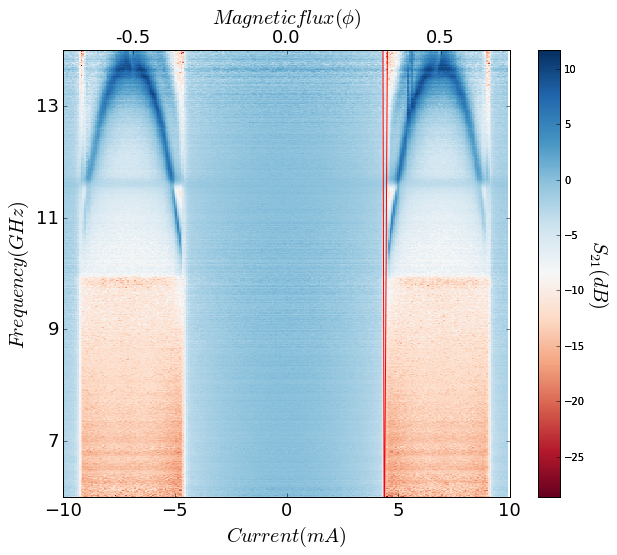

In [23]:
fig, axes = plt.subplots(figsize=(10, 8))
ax2 = axes.twiny()
axes.set_xlim([-10, 10])
axes.set_ylim([6, 14])

p = axes.pcolor(currents*1e3, frequency/1e9, s21, cmap=cm.RdBu)
p2 = ax2.plot(phi_range/(2*np.pi), (energies[:,1]-energies[:,0])/1e9,'r')

cb1 = fig.colorbar(p, ax=axes)
cb2 = fig.colorbar(p, ax=ax2)
#axes[0].axis('tight')
axes.set_xlabel(r'$Current (mA)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

plt.yticks(range(7, 15, 2));

new_tick_locations = np.array([-.50, 0, .50])
ax2.set_xlim(np.asarray([-0.5,0.5])/0.69)
new_tick_labels = np.array([-0.5, 0, 0.5])
ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r"$Magnetic flux (\phi)$", fontsize=20)
cb1.set_label('$S_{21} (dB)$', labelpad=25, rotation=270, fontsize=20)


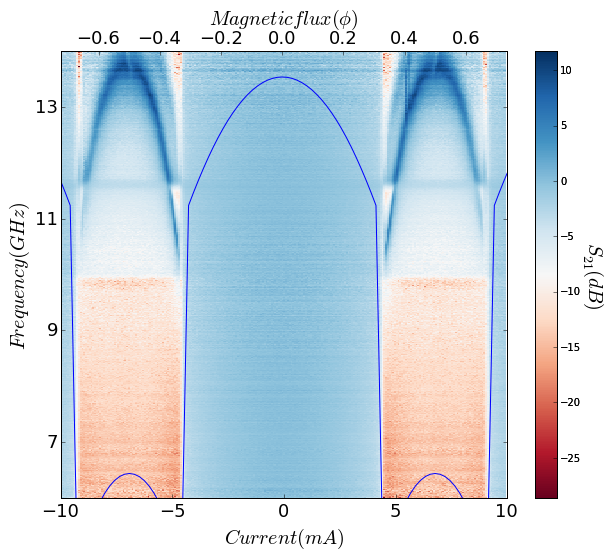

In [30]:
catsears = energies[:,1]-energies[:,0]
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])
catsears = np.append(catsears, np.flipud(catsears)[1:])

fig, axes = plt.subplots(figsize=(10, 8))
ax2 = axes.twiny()
axes.set_xlim([-10, 10])
axes.set_ylim([6, 14])

phi_range_big = np.linspace(-4*np.pi, 4*np.pi, len(catsears))
p = axes.pcolor(currents*1e3, frequency/1e9, s21, cmap=cm.RdBu)
p2 = ax2.plot(phi_range_big/(2*np.pi), catsears/1e9)

cb1 = fig.colorbar(p, ax=axes)
cb2 = fig.colorbar(p, ax=ax2)
#axes[0].axis('tight')
axes.set_xlabel(r'$Current (mA)$', fontsize=20)
axes.set_ylabel(r'$Frequency (GHz)$', fontsize=20)

plt.yticks(range(7, 15, 2));

#new_tick_locations = np.array([.15, .5, .85])
ax2.set_xlim(np.asarray([-0.5/0.69,0.5/0.68]))
#new_tick_labels = np.array([-0.5, 0, 0.5])
ax2.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r"$Magnetic flux (\phi)$", fontsize=20)
cb1.set_label('$S_{21} (dB)$', labelpad=25, rotation=270, fontsize=20)